In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 텐서와 연산

### 텐서

In [6]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [7]:
tf.constant(42) # 스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [8]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
t.shape

TensorShape([2, 3])

In [10]:
t.dtype

tf.float32

### 인덱싱

In [11]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [12]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### 연산

In [13]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [14]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [15]:
t @ tf.transpose(t) # t와 t.T의 행렬곱, 참고로 t.T는 넘파이에서 데이터의 전치된 뷰일 뿐임.

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### `keras.backend` 사용하기 

keras.backend에 자체 저수준 API를 가지고 있는데, 다른 케라스 구현에 적용할 수 있는 코드를

작성하고 싶다면 이런 케라스 함수를 사용해야 함. 

하지만 케라스 저수준 함수는 텐서플로에서 제공하는 함수의 일부만 지원.

In [16]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## 텐서와 넘파이

### 넘파이 변환

In [17]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [18]:
t.numpy() # 또는 np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [19]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [20]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

###### CAUTION_ 
넘파이는 64bit 정밀도, 텐서플로는 32bit 정밀도를 사용. 일반적으로 신경망은 32bit로 충분하고 더 빠르고 메모리도 적게 사용하기 때문. 넘파이 배열로 텐서를 만들 때 dtype=tf.float32 지정.

### 타입 변환

성능을 크게 감소시킬 수 있음. 타입이 자동으로 변환되면 사용자가 눈치채지 못할 수 있음.

이를 방지하기 위해 어떤 타입변환도 자동으로 수행되지 않음. 호환되지 않는 타입의 텐서로 연산 실행은 예외

In [21]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [22]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


진짜 타입변환이 필요할 때는 tf.cast() 함수를 사용할 수 있음.

In [23]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 문자열 배열

In [24]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [25]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [26]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [27]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


### 래그드 텐서

In [28]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [29]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [30]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [31]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [32]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [33]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

### 희소 텐서

In [34]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [35]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [36]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [37]:
s2 = s * 2.0

In [38]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [39]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [40]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [41]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [42]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### 집합

In [43]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [44]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [45]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

### 변수

In [46]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [47]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [48]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [49]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [50]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [51]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### 텐서 배열

In [52]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [53]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [54]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [55]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [56]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

### 다른 데이터 구조

* 희소 텐서(tf.SparseTensor)
  대부분 0으로 채워진 텐서를 효율적으로 나타냄.

* 텐서 배열(tf.TensorArray)
  텐서의 리스트. 기본적으로 고정된 길이를 가지지만 동적으로 바꿀 수 있음.

* 래그드 텐서(tf.RaggedTensor)
  리스트의 리스트를 나타냄. 텐서에 포함된 값은 동일한 데이터 타입을 가져야 하지만 
  리스트의 길이는 다를 수 있음.

* 문자열 텐서(string Tensor)
  
* 집합(set)

* 큐(queue)

# 사용자 정의 모델과 훈련 알고리즘

### 사용자 정의 손실 함수

회귀모델을 훈련하는데 훈련세트에 잡음이 조금있다고 가정. 물론 데이터셋을 수정해볼 수 있으나 비효율적.
어떤 손실함수를 사용해야 하는가? 

-> MSE는 큰 오차에 너무 큰 벌칙을 가하고, MAE는 이상치에 관대해 훈련이 수렴되기까지 시간이 오래걸림. 떄문에 부적절 후버 손실(10장 참조)이 답이다!

캘리포니아 주택 데이터셋을 로드하여 준비해 보겠습니다. 먼저 이 데이터셋을 로드한 다음 훈련 세트, 검증 세트, 테스트 세트로 나눕니다. 마지막으로 스케일을 변경합니다:

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [58]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1      # tf.abs :텐서의 절댓값 계산
    squared_loss = tf.square(error) / 2     # tf.square : 텐서의 제곱 연산
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

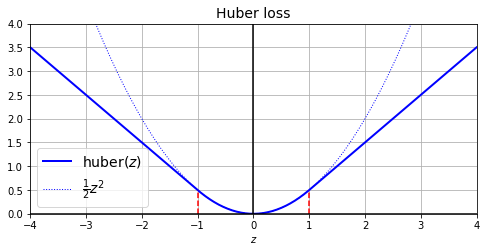

In [59]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [60]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

전체 손실의 평균이 아니라 샘플마다 하나의 손실을 담은 텐서를 반환하는 것이 좋음.

필요할 때 케라스가 클래스 가중치나 샘플 가중치를 적용할 수 있음.(10장 참조)

In [61]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])
# metrics 는 훈련 모니터링 용, 분류 : accuracy,
# 회귀 : mse, rmse, r2, mae, mspe, mape, msle 등으로 지정.
# 사용자가 매트릭을 정의해 사용할 수 있음.

In [62]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 12ms/step - loss: 0.6015 - mae: 0.9467 - val_loss: 0.2322 - val_mae: 0.5245
Epoch 2/2
363/363 [==============================] - 4s 11ms/step - loss: 0.2107 - mae: 0.5068 - val_loss: 0.2149 - val_mae: 0.4986


#### tf.where

Return the elements where condition is True (multiplexing x and y).

In [63]:
tf.where([True, False, False, True], [1,2,3,4], [100,200,300,400])

# [1, 200, 300, 4]

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  1, 200, 300,   4])>

### 사용자 정의 요소를 가진 모델을 저장하고 로드하기

일반적으로 사용자 정의 객체를 포함한 모델을 로드할 때는 그 이름과 객체를 매칭해야 함.

In [64]:
model.save("my_model_with_a_custom_loss.h5")

In [65]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [66]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2027 - mae: 0.4940 - val_loss: 0.2019 - val_mae: 0.4846
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.1984 - mae: 0.4884 - val_loss: 0.1947 - val_mae: 0.4751


앞서 구현한 함수는 -1과 1 사이의 오차는 작은 것으로 간주. 다른 기준이 필요할 때 한가지 방법은

매개변수를 받을 수 있는 함수를 만드는 것.

#### 다른 기준을 가진 huber 손실 함수 만들기

In [67]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [68]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [69]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2197 - mae: 0.4869 - val_loss: 0.2261 - val_mae: 0.4815
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2155 - mae: 0.4825 - val_loss: 0.2117 - val_mae: 0.4678


In [70]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

안타깝게도 모델을 저장할 때 이 threshold 값은 저장 안 됨. 따라서 모델을 로드할 때

threshold 값을 지정해야함. ("huber_fn"을 사용)

In [71]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [72]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 11ms/step - loss: 0.2120 - mae: 0.4787 - val_loss: 0.1985 - val_mae: 0.4568
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2088 - mae: 0.4734 - val_loss: 0.2434 - val_mae: 0.4799


In [73]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

이 코드를 살펴보면 :

* 생성자는 기본적인 하이퍼파라미터를 **kwargs로 받은 매개변수 값을 부모클래스의 생성지에게 전달.
  손실함수의 name과 개별 샘플의 손실을 모으기 위해 사용할 reduction 알고리즘. 기본값은
  "sum_over_batch_size"로 샘플 손실에 가중치를 곱하여 더하고 배치 크기로 나눔
  (가중치 합으로 나누지 않으므로 이 손실은 가중치 평균이 아님).
  샘플 가중치가 없다면 1.0으로 간주. 다른값으로는 "sum"과 "none"이 있음.

* call()은 레이블과 예측을 받고 모든 샘플의 손실을 계산해 반환.

* get_config()는 하이퍼파라미터 이름과 같이 매핑된 딕셔너리를 반환함. 먼저 부모 클래스의
  get_config()를 호출하고 그다음 반환된 딕셔너리에 새로운 하이퍼파라미터를 추가함.

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

모델 컴파일할 때 이 클래스의 인스턴스를 사용할 수 있음.

In [75]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [76]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 0.7608 - mae: 0.9361 - val_loss: 0.2992 - val_mae: 0.5456
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2467 - mae: 0.5130 - val_loss: 0.2370 - val_mae: 0.4925


In [77]:
model.save("my_model_with_a_custom_loss_class.h5")

모델을 저장할 때 임곗값도 저장됨. 로드시에 클래스 이름과 클래스 자체를 매핑해줘야 함.

In [78]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

모델 저장할 때 케라스는 손실 객체의 get_config()를 호출해 반환된 설정을 HDF5 파일에

JSON 형태로 저장. 모델을 로드하면 HuberLoss 클래스의 from_config() 클래스 메서드를 호출함.

이 메서드는 기본 손실 클래스(Loss)에 구현되어 있고 생성자에게 **config 매개변수를

전달해 클래스의 인스턴스를 만듦.

In [79]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2281 - mae: 0.4940 - val_loss: 0.2130 - val_mae: 0.4743
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.2212 - mae: 0.4870 - val_loss: 0.2186 - val_mae: 0.4774


In [80]:
model.loss.threshold

2.0

## 그외 사용자 정의 함수

### 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

손실, 규제, 제한, 초기화, 지표, 활성화함수, 층, 모델과 같은 대부분의 케라스 기능은

유사한 방법으로 커스터마이징할 수 있음.

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

아래의 예는 사용자 정의 활성화 함수(keras.activations.softplus()나 tf.nn.softplus()와 동일),

사용자 정의 글로럿 초기화(keras.initializers.glorot_normal()과 동일), 사용자 정의 $\ell_1$ 규제

(keras.regularizers.l1(0.01)과 동일), 양수인 가중치만 남기는 사용자 정의 제한

(keras.constraints.nonneg()나 tf.nn.relu()와 동일)에 대한 예.

In [82]:
def my_softplus(z): # tf.nn.softplus(z) 값을 반환합니다
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

매개변수는 사용자 정의하련느 함수의 종류에 따라 다름. 만들어진 사용자 정의 함수는 

보통의 함수와 동일하게 사용가능.

In [83]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

이 활성화함수는 Dense 층의 출력에 적용되고 다음 층에 그 결과가 전달됨.

층의 가중치는 초기화 함수에서 반환값으로 초기화. 

훈련스텝마다 가중치가 규제 함수에 전달되어 규제 손실을 계산하고 전체손실에 추가되어 훈련을 위한 최종손실을 만듦. 

마지막으로 제한 함수가 훈련스텝마다 호출되어 층의 가중치를 제한한 가중치 값으로 바뀜.

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [86]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [87]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 11ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [88]:
model.save("my_model_with_many_custom_parts.h5")

In [89]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

함수가 모델과 함께 저장해야 할 하이퍼파라미터를 가지고 있다면 keras.regularizer.Regularizer,

keras.constraint.Constraint, keras.initializer.Initializer, keras.layers.Layer와 같이 

적절한 클래스를 상속. 다음은 사용자 정의 손실을 만들었던 것처럼 factor 하이퍼파라미터를

저장하는 $\ell_1$ 규제를 위한 간단한 클래스의 예입니다(이 경우 부모클래스에 생성자와

get_config() 메서드가 정의되어 있지 않기에 호출할 필요 없다).

In [90]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

손실, (활성화 함수를 포함해) 층, 모델의 경우 call()를 구현해야 함.

규제, 초기화, 제한의 경우 __call__()을 구현해야 함. 지표의 경우 조금 다름.

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [93]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [94]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 11ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [95]:
model.save("my_model_with_many_custom_parts.h5")

In [96]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

### 사용자 정의 지표

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

손실과 지표는 개념적으로는 다르지 않다.

손실(ex.크로스엔트로피)은 모델을 훈련하기 위해 경사하강법에서 사용하므로 (적어도 평가할 영역은)

미분가능해야 하고 그레디언트가 모든 곳에서 0이 아니어야 하며, 사람이 이해할 수 없어도 괜춘.

반면 지표는 미분X, 모든 곳에서 그레디언트가 0이어도 괜춘.

|

그렇지만 대부분 사용자 지표 함수를 만드는 것은 사용자 손실함수를 만드는 것과 동일.

In [99]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [100]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.6052 - huber_fn: 0.2733


**노트**: 손실과 지표에 같은 함수를 사용하면 다른 결과가 나올 수 있습니다. 이는 일반적으로 부동 소수점 정밀도 오차 때문입니다. 수학 식이 동일하더라도 연산은 동일한 순서대로 실행되지 않습니다. 이로 인해 작은 차이가 발생합니다. 또한 샘플 가중치를 사용하면 정밀도보다 더 큰 오차가 생깁니다:

* 에포크에서 손실은 지금까지 본 모든 배치 손실의 평균입니다. 각 배치 손실은 가중치가 적용된 샘플 손실의 합을 _배치 크기_ 로 나눈 것입니다(샘플 가중치의 합으로 나눈 것이 아닙니다. 따라서 배치 손실은 손실의 가중 평균이 아닙니다).
* 에포크에서 지표는 가중치가 적용된 샘플 손실의 합을 지금까지 본 모든 샘플 가중치의 합으로 나눈 것입니다. 다른 말로하면 모든 샘플 손실의 가중 평균입니다. 따라서 위와 같지 않습니다.

수학적으로 말하면 손실 = 지표 * 샘플 가중치의 평균(더하기 약간의 부동 소수점 정밀도 오차)입니다.

In [101]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [102]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.1131 - huber_fn: 0.2297


In [103]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11749906837940216, 0.11906624094207695)

### 스트리밍 지표

In [104]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [105]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [106]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [107]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [108]:
precision.reset_states()

스트리밍 지표 만들기:

In [109]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

이 코드를 하나씩 살펴봅시다.

* 생성자는 add_weight()를 사용해 여러 배치에 걸쳐 지표의 상태를 기록하기 위한 변수를 만듦.

  이 예에서는 후버손실의 합(total)과 지금까지 처리한 샘플 수(count)를 기록. 원한다면 수동으로

  변수를 만들 수 있음. 케라스는 속성으로 만들어진 모든 tf.Variable을 (좀 더 일반적으로 층이나
  
  모델처럼 모든 추적이 가능한 객체를) 관리함.

* update_state()는 이 클래스를 함수처럼 사용할 때 호출됨(Precision 객체에서 했던 것처럼).

  배치의 레이블과 예측을 (그리고 이 예에서는 없으나 샘플 가중치를) 바타응로 변수를 업데이트함.

* result()는 최종결과를 계산하고 반환함. 이 예에서는 모든샘플에 대한 평균 후버 손실값.

  이 지표를 클래스를 함수처럼 사용하면 먼저 update_state() 메서드가 호출되고 그다음 result()

  메서드가 호출되어 출력이 반환됨.

* reset_status() 메서드는 기본적으로 모든 변수를 0.0으로 초기화함.
  
  (필요하면 이 함수를 재정의할 수 있음)

In [110]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [111]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [112]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [113]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

`HuberMetric` 클래스가 잘 동작하는지 확인해 보죠:

In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [116]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [117]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 8ms/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.2595 - huber_metric: 0.2595


In [118]:
model.save("my_model_with_a_custom_metric.h5")

In [119]:
model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [120]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.2278 - huber_metric: 0.2278


In [121]:
model.metrics[-1].threshold

2.0

### 사용자 정의 층

모델이 층 A,B,C,A,B,C 순서대로 구성되어 있다면

ABC를 묶어 D로 정의, D,D,D 로 구성된 모델을 만들 수 있습니다.

keras.layers.Flatten, keras.layers.ReLU 같은 층 가중치가 없습니다.

텐서플로에는 없는 특이한 층을 가진 네트워크를 만들어야 할 때가 있음.

가중치가 필요없는 사용자 정의 층을 만들기 위한 가장 간단한 방법은 파이썬 함수를 만든 후

keras.layers.Lambda 층으로 감싸는 것. 예로 입력에 지수함수를 적용하는 층.

In [122]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [123]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

In [124]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [125]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 6ms/step - loss: 1.0631 - val_loss: 0.4457
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 0.4562 - val_loss: 0.3798
Epoch 3/5
363/363 [==============================] - 2s 5ms/step - loss: 0.4029 - val_loss: 0.3548
Epoch 4/5
363/363 [==============================] - 2s 5ms/step - loss: 0.3851 - val_loss: 0.3464
Epoch 5/5
162/162 [==============================] - 0s 3ms/step - loss: 0.3586


0.3586341142654419

이 사용자 정의 층을 시퀀셜 API나 함수형 API, 서브클래싱 API에서 보통의 층과 동일하게 사용가능.

또는 활성화 함수로 사용가능(activation=tf.exp, activation=keras.activations.exponential

또는 activation="exponential"을 사용할 수도 있음).

지수함수는 이따금 회귀모델에서 예측값의 스케일이 매우 다를 때 출력층에 사용됨(ex. 0.001, 10, 1,000).

상태가 있는 층(즉, 가중치를 가진 층)을 만들려면 keras.layers.Layer를 상속해야 함.

예로 다음 클래스는 Dense 층의 간소화 버전을 구현한 것.

In [126]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

코드를 살펴보면 :

* 생성자는 모든 하이퍼파라미터를 매겨변수로 받음(여기에는 units와 activation).

  **kwargs 매개변수를 추가하는 것도 중요. 부모 생성자를 호출하면서 kwargs를 전달함.

  이를 통해 input_shape, trainable, name과 같은 기본 매개변수들을 처리 가능.

  그다음 하이퍼파라미터를 속성으로 저장하고 activation 매개변수를 keras.activation.get() 함수

  (이 함수는 함수 객체나 "relu", "selu", None과 같은 문자열을 받음)를 사용해 적절한 활성화함수로 바꿈

* build() 메서드의 역할은 가중치마다 add_weight() 메서드를 호출해 층의 변수를 만드는 것.

  build() 메서드는 층이 처음 사용될 때 호출됨. 이 시점이 되면 케라스가 층의 입력크기를 

  알고있을 것이므로 build() 메서드의 입력으로 크기를 전달함. 가중치를 만들 떄

  크기가 꼭 필요한 경우가 종종 있음. 예를 들어 연결 가중치(즉, "kernel")를 만들려면

  이전 층의 뉴런개수를 알아야 함. 이 크기는 입력의 마지막 차원크기에 해당. 
  
  build() 메서드 (반드시) 끝에서 부모의 build() 메서드를 호출해야함. 
  
  이를 통해 층이 만들어졌다는 것을 케라스가 인식함(self.built=True로 설정됨).

* call()는 이 층에 필요한 연산 수행. 이 경우 입력X 와 층의 커널을 행렬 곱셈하고 편향을

  더함. 그다음 결과에 활성화함수를 적용함. 이 값이 층의 출력.

* compute_output_shape()는 이 층의 출력 크기를 반환함. 이 예에서는 마지막 차원을 제외하고

  입력과 크기가 같음. 마지막 차원은 이 층의 뉴런 개수임. tf.keras에서 크기는

  tf.TensorShape 클래스의 객체. 이 객체는 as_list()를 사용해 파이썬 리스트로 바꿀 수 있음.

* get_config()는 앞서 보았던 것과 같음. keras.activation.serialize()를 사용해 

  활성화 함수의 전체 설정을 저장.

In [127]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [128]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [129]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.5474


0.5473727583885193

In [130]:
model.save("my_model_with_a_custom_layer.h5")

In [131]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

#### 입력, 출력의 수를 추가하는 방법
여러가지 입력을 받는 층을 만들려면 call() 메서드에 모든 입력이 포함된 튜플을 매개변수 값으로 전달해야함

compute_output_shape() 메서드의 매개변수도 각 입력의 배치 크기를 담은 튜플이어야 함

여러 출력을 가진 층을 만들려면 call() 메서드가 출력을 반환해야함

In [132]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # 사용자 정의 층 디버깅
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

사용자 정의 층은 다음처럼 함수형 API를 사용해 호출할 수 있습니다:

In [133]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


`call()` 메서드는 심볼릭 입력을 받습니다. 이 입력의 크기는 부분적으로만 지정되어 있습니다(이 시점에서는 배치 크기를 모릅니다. 그래서 첫 번째 차원이 None입니다):

사용자 층에 실제 데이터를 전달할 수도 있습니다. 이를 테스트하기 위해 각 데이터셋의 입력을 각각 네 개의 특성을 가진 두 부분으로 나누겠습니다:

In [134]:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

# 분할된 데이터 크기 출력
X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

크기가 완전하게 지정된 것을 볼 수 있습니다:

In [135]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


함수형 API를 사용해 완전한 모델을 만들어 보겠습니다(이 모델은 간단한 예제이므로 놀라운 성능을 기대하지 마세요):

In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4)  X2.shape:  (None, 4)


In [137]:
model.compile(loss='mse', optimizer='nadam')

In [138]:
model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 4s 10ms/step - loss: 2.1142 - val_loss: 1.3630
Epoch 2/2
363/363 [==============================] - 4s 12ms/step - loss: 0.9684 - val_loss: 0.9773


훈련과 테스트에서 다르게 동작하는 층을 만들어 보죠:

In [139]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

다음은 사용자 정의 층을 사용하는 간단한 모델입니다:

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

In [141]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 2.3857 - val_loss: 7.6082
Epoch 2/2
162/162 [==============================] - 0s 3ms/step - loss: 0.7560


0.7559615969657898

### 사용자 정의 모델

이미 10장에서 서브클래싱 API를 설명할 때 어떻게 사용자 정의 모델 클래스를 만드는지 알아보았습니다.

방법은 간단. keras.Model 클래스를 상속해 생성자에서 층과 변수를 만들고 모델이 해야 할 작업을 

call()에 구현함.

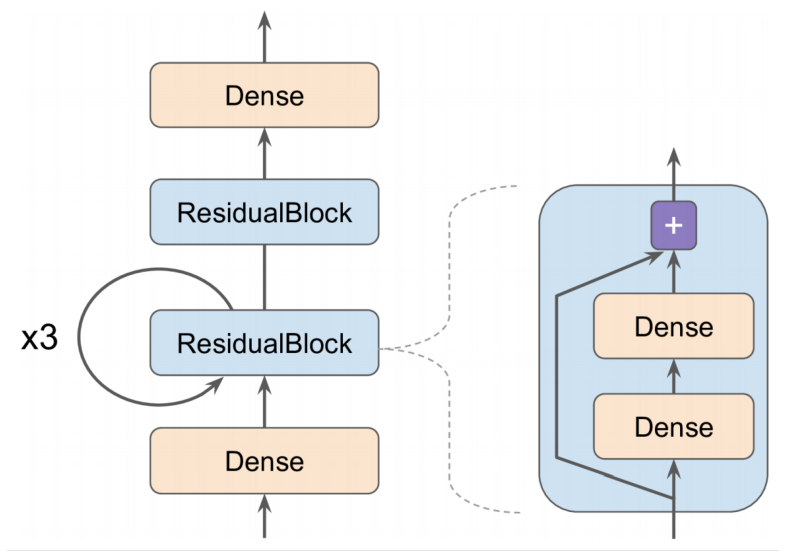

In [142]:
import matplotlib.image as mpimg

filename = "user_def_model.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

##### 잔차 블록 정의 :

이 층은 다른 층을 포함하고 있음

keras는 자동으로 필요한 변수(여기서는 층)을 이층의 변수 리스트에 추가함

입력이 1번째 완전연결 층을 통과해 2개의 완전 연결 층과 스킵 연결로 구성된 잔차 블록으로 전달됨.

그다음 동일한 잔차 블록에 3번 더 통과시킴. 그 다음 2번째 잔차블록을 지나 마지막 출력이 

완전연결된 출력 층에 전달됨. 이런 구조는 실제 사용되는 것이 아님. 필요하다면 반복문이나 

스킵 연결도 있는 어떤 종류의 모델도 쉽게 만들 수 있다는 것을 보이기 위한 예시일 뿐.

이 모델을 구현하려면 동일한 블록을 여러개 만들어야 하므로 (또한 다른 모델 재사용하기 위해)

먼저 ResidualBlock 층을 만들겠습니다.

In [143]:
X_new_scaled = X_test_scaled

In [144]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

# 케라스가(여기는 층)가 담긴 hidden 속성을 감지하고 필요한 변수를 자동으로
# 이 층의 변수 리스트에 추가. 이 클래스의 나머지는 그 자체로 이해가능. 그다음 서브클래싱 API를 사용해 모델 정의

class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

생성자에서 층을 만듬, call() 메서드에서 이를 사용

이로써 시퀀셜 API, 함수형 API, 서브클래싱 API를 사용해 논문의 나오는 

거의 모든 모델이나 이런 모델을 합성한 모델도 간결하게 만들 수 있음.

아직 더 살펴봐야 할것들이 있는데,

* 모델 내부 구조에 기반한 손실과 지표를 만드는 방법
* 사용자 정의 훈련 반복을 만드는 방법

##### TIP

모델이 층보다 더 많은 기능을 제공한다면, 왜 층을 모델처럼 정의하지 않냐>

기술적으로는 가능하나 일반적으로 모델 내의 내부구성요소를 모델과 구분하는 것이 당연.

전자는 Layer 클래스를 상속해야 하고 후자는 Model 클래스를 상속해야 함.

In [145]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [146]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [147]:
model = keras.models.load_model("my_custom_model.ckpt")

In [148]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 9s 21ms/step - loss: 8.8315
Epoch 2/5
363/363 [==============================] - 8s 21ms/step - loss: 3.2740
Epoch 3/5
363/363 [==============================] - 8s 21ms/step - loss: 0.8302
Epoch 4/5
363/363 [==============================] - 7s 21ms/step - loss: 0.8152
Epoch 5/5
162/162 [==============================] - 1s 5ms/step - loss: 0.7664


In [149]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 7s 19ms/step - loss: 0.9238
Epoch 2/5
363/363 [==============================] - 6s 15ms/step - loss: 0.9064
Epoch 3/5
363/363 [==============================] - 7s 20ms/step - loss: 0.5512
Epoch 4/5
363/363 [==============================] - 7s 20ms/step - loss: 0.7115
Epoch 5/5
363/363 [==============================] - 8s 21ms/step - loss: 1.3318


대신 시퀀셜 API를 사용하는 모델을 정의할 수 있습니다:

In [150]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [151]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [152]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 7s 17ms/step - loss: 0.8695
Epoch 2/5
363/363 [==============================] - 6s 18ms/step - loss: 0.4720
Epoch 3/5
363/363 [==============================] - 6s 15ms/step - loss: 0.5537
Epoch 4/5
363/363 [==============================] - 5s 15ms/step - loss: 0.3809
Epoch 5/5
162/162 [==============================] - 1s 4ms/step - loss: 0.4852


### 모델 구성 요소에 기반한 손실과 지표

**노트**: 다음 코드는 책의 코드와 두 가지 다른 점이 있습니다:
1. 생성자에서 `keras.metrics.Mean()` 측정 지표를 만들고 `call()` 메서드에서 사용하여 평균 재구성 손실을 추적합니다. 훈련에서만 사용해야 하기 때문에 `call()` 메서드에 `training` 매개변수를 추가합니다. `training`이 `True`이면 `reconstruction_mean`를 업데이트하고 `self.add_metric()`를 호출합니다.
2. TF 2.2에 있는 이슈([#46858](https://github.com/tensorflow/tensorflow/issues/46858)) 때문에 `build()` 메서드 안에서 `super().build()`를 호출하면 안됩니다.

앞서 정의한 사용자 손실과 지표는 모두 레이블과 예측을 기반으로함

은닉층의 가중치나 활성화 함수 등과 같이 모델 구성 요소에 기반한 손실을 정의해야 할때가 있음

이런 손실은 모델의 내부 모니터링 상황을 모니터링 할 때 유용함


In [153]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        #super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        self.recon_loss = 0.05 * tf.reduce_mean(tf.square(reconstruction - inputs))
        
        if training:
           result = self.reconstruction_mean(recon_loss)
           self.add_metric(result)
        return self.out(Z)
    
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x)
            loss = self.compiled_loss(y, y_pred, regularization_losses=[self.recon_loss])

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        return {m.name: m.result() for m in self.metrics}

* 생성자가 다섯개의 은닉층과 하나의 출력층으로 구성된 심층 신경망

* 생성자에서 덴스 레이어를 하나 더 추가하여 모델의 입력을 재구성하는데 사용, 완전 연결층의 유닛 개수는 
  입력 개수와 같아야함.

* call()에서 입력이 다섯개의 은닉층에 모두 통과시킴, 결과값을 재구성층에 넘겨 재구성값을 만듦

 * call()에서 재구성 손실을 계산하고, add_metric 함수를 호출해 모델에 지표를 추가함

* 출력층에 결과를 반환함

* train_step 마다 손실을 계산, fit에서 내부적으로 일어나는 훈련 스텝을 customize 하는 방법

In [154]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [155]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 8s 17ms/step - loss: 0.7885 - reconstruction_error: 0.0000e+00
Epoch 2/2
363/363 [==============================] - 7s 19ms/step - loss: 0.4127 - reconstruction_error: 0.0000e+00


### 자동미분을 사용해 그레디언트 

자동미분(10장과 부록 D 참조)

In [156]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

각 파라미터가 바뀔 때마다 함수의 출력이 얼마나 변하는지 측정해 도함수의 근삿값을 계산 :

In [157]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [158]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

자동미분 이용 :

In [159]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [160]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

##### TIP

메모리를 절약하려면 tf.GradientTape() 블록 안에 최소한 만 담을 것!

gradient()가 호출된 후 자동으로 테이프가 즉시 지워짐. 따라서 gradient()를 2번 호출시 예외 발생!

gradient() 한번 이상 호출해야 한다면 지속가능한 테이프를 만들고 사용이 끝난 후 테이프를

삭제해 리소스를 해제해야함.

In [161]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [162]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

기본적으로 테이프는 변수가 포함된 연산만을 기록. 변수가 아닌 다른 객체에 대한 

z의 그레디언트를 계산하면 None이 반환

In [163]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [164]:
gradients

[None, None]

하지만 필요한 어떤 텐서라도 감시해 관련된 모든 연산을 기록하도록 강제할 수 있음.

In [165]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [166]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

대부분의 경우 그레이디언트 계산은 여러값 에 대한 한값의 그레이디언트를 계산하는데에 사용

여러 손실이 포함된 벡터의 그레이디언트를 계산하면 벡터 합의 그레이디언트를 계산함

만약 개별 그레이디언트를 계산하고싶으면 jacobian(야코비) 메서드를 호출해야함

신경망의 일부분에 그레이디언트 역전파가 되지 않도록 막고싶다면, stop_graident() 메서드 사용

때로 유용하기도 함. 예로 입력이 작을 때 변동 폭이 큰 활성화 함수에 대한 규제 손실을 구현하는 경우

In [167]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

가끔 그레이디언트 계산시 부동소수점 정밀도 오류로 인해 

자동미분이 무한 나누기 계산을 하게되어 NaN 반환.

In [168]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

다행이 수치적으로 안전한 소프트플러스의 도함수를 해석적으로 구할수 있음.

@tf.custom_gradient 데코레이터를 사용하여 일반 출력과 도함수를 계산하는 함수를 반환하여 텐서플로가 

my_softplus 함수의 그레이디언트를 계산할때 안전한 함수를 사용하도록 만듦.

In [169]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

### 사용자 정의 훈련 반복

fit() 메서드의 유연성이 원하는 만큼 충분하지 않을 수 있음. 사용자 훈련을 직접 만드는 것의 단점

* 길고
* 버그가 발생하기 쉽고
* 유지보수하기 어려운 코드가 만들어진다.

정말로 필요한게 아니면, fit()을 사용하는것을 권장

In [170]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [172]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [173]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [174]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [175]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [176]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 - mean: 0.6440 - mean_absolute_error: 0.5222


* 두개의 반복문 중첩 (에포크, 배치)
* random_batch로 랜덤하게 샘플링
* tf.GradientTape 블럭 안에서 모델을 사용하여 예측을하고, loss_fn을 통해 로스 계산, 

  평균을 loss를 계산, 규제 손실 loss를 더함
* 훈련가능한 각 변수의 손실에 대한 gradient계산, 경사 하강법 수행
* 모델에 가중치 제한을 두었으면 제한 적용
* 평균 손실과 지표를 업데이트 상태막대 출력
* 매 에포크 평균 손실과 지표를 초기화

In [177]:
try:
    from tqdm.notebook import trange
    from collections import OrderedDict
    with trange(1, n_epochs + 1, desc="All epochs") as epochs:
        for epoch in epochs:
            with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(X_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch)
                        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for variable in model.variables:
                        if variable.constraint is not None:
                            variable.assign(variable.constraint(variable))                    
                    status = OrderedDict()
                    mean_loss(loss)
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_states()
except ImportError as ex:
    print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

To run this cell, please install tqdm, ipywidgets and restart Jupyter


## 텐서플로 함수와 그래프

텐서플로 1에서 그래프는 텐서플로 API의 핵심으로 피할수 없었고 복잡도가 높았음

텐서플로 2에도 그래프가 있지만, 이전만큼 핵심적이지는 않고 사용하기가 매우 쉬워짐 

(그래프 자동 생성 기능 때문)

In [178]:
def cube(x):
    return x ** 3

In [179]:
cube(2)

8

In [180]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

tf.function을 사용하면, 파이썬 함수를 텐서플로 함수로 바꿀 수 있음


In [181]:
tf_cube = tf.function(cube)
tf_cube

In [182]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [183]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

* 텐서플로는 사용하지 않는 노드를 제거하고 표현을 단수화 하여 계산 그래프를 최적화

* 가능하면 병렬로 연산을 수행하여 효율적으로 실행, 복잡한 연산을 수행할때 두드러짐

* 파이썬 함수를 빠르게 실행하려면 텐서플로 함수로 변환!

텐서플로는 입력 크기와 데이터 타입에 맞춰 새로운 그래프 를 생성하고, 

다음 입력에 대해 재사용 가능한 경우 재사용, 혹은 재생성을 함


### TF 함수와 콘크리트 함수

In [184]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [185]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [186]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### 함수 정의와 그래프

In [187]:
concrete_function.graph

In [188]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [189]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [190]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [191]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [192]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [193]:
concrete_function.function_def.signature

name: "__inference_cube_612907"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### TF 함수가 계산 그래프를 추출하기 위해 파이썬 함수를 트레이싱하는 방법

In [194]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [195]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [196]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [197]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # New shape: trace!

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


특정 입력 시그니처를 지정하는 것도 가능합니다:

In [198]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("트레이싱", images)
    return images[:, ::2, ::2] # 행과 열의 절반을 버립니다

In [199]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [200]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # 함수 트레이싱
preprocessed_images = shrink(img_batch_2) # 동일한 콘크리트 함수 재사용

트레이싱 Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [201]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # 다른 타입이나 크기 거부
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)).


### 오토그래프와 트레이싱

#### 오토그래프를 사용해 제어 흐름 나타내기

`range()`를  사용한 정적인 `for` 반복:

In [202]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [203]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [204]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

`tf.while_loop()`를 사용한 동적인 반복:

In [205]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [206]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [207]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

(오토그래프에 의한) `tf.range()`를 사용한 동적인 `for` 반복:

In [208]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [209]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### TF 함수에서 변수와 다른 자원 다루기

In [210]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [211]:
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [212]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [213]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [214]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [215]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [216]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [217]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [218]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [219]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

In [220]:
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### 텐서플로 함수 사용법

1. 넘파이나 표준 라이브러리 호출시 트레이싱 과정에 호출되어 그래프 연산에 포함되지 않음
이에 따라 발생하는 Effect 들이 있는데 몇가지 예시를 들면

* np.random.rand()를 사용하면, 같은 dtype input에 대해서는 같은 난수가 fix 되어 있음(그래프 내에 상수화 저장?)

* 텐서플로에서 지원하지 않는 코드, 로깅 코드라면 트레이싱시에만 실행되므로 로깅이 되지 않음

* 아무 코드나 tf.py_function을 감쌀수있지만, 하지만 텐서플로가 어떤 최적화 불가능하면 성능에 방해가 될뿐이다

2. 그래프 모드로 계산할 첫번째 함수만 데코레이터를 적용하면, 내부에서 사용하는 함수들은 감지가 되어 같은 규칙을 따름

3. 함수에서 텐서플로 변수를 만든다면, 처음에만 호출되어야 한다.

    아니면 exception 발생.

    변수에 값 할당시 = 연산자 대신 assign() 메서드를 사용하라

4. 파이썬 함수의 소스코드는 텐서플로에서 사용 가능해야함

    Python shell에서 실행하거나, 컴파일된 *.pyc 배포시 접근 불가면, 그래프 생성 과정이 실패하거나 일부 기능을 사용 할 수 없다.

5. 텐서플로는 텐서나 데이터 셋을 순회하는 for문만 감지한다.

    for i in ragne(x) 대신, for i in tf.range(x)를 사용하라.

6. 성능 면에서는 반복문보다 가능한 벡터화된 구현을 사용하는것이 좋다.


## tf.keras와 TF 함수를 함께 사용하거나 사용하지 않기

기본적으로 tf.keras는 자동으로 사용자 정의 코드를 TF 함수로 변환하기 때문에 

`tf.function()`을 사용할 필요가 없습니다:

In [221]:
# 사용자 손실 함수
def my_mse(y_true, y_pred):
    print("my_mse() 손실 트레이싱")
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 사용자 지표 함수
def my_mae(y_true, y_pred):
    print("my_mae() 지표 트레이싱")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [222]:
# 사용자 정의 층

class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("MyDense.call() 트레이싱")
        return self.activation(X @ self.kernel + self.biases)

In [223]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [224]:
# 사용자 정의 모델
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("MyModel.call() 트레이싱")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [225]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [226]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
359/363 [============================>.] - ETA: 0s - loss: 1.3339 - my_mae: 0.7926MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
363/363 [==============================] - 5s 11ms/step - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.4164 - my_mae: 0.4639


[0.41635245084762573, 0.4639028012752533]

In [227]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [228]:
model = MyModel(dynamic=True)

In [229]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

사용자 정의 코드는 반복마다 호출됩니다. 너무 많이 출력되는 것을 피하기 위해 작은 데이터셋으로 훈련, 검증, 평가해 보겠습니다:

In [230]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱


[5.507259368896484, 2.0566811561584473]

또는 모델을 컴파일할 때 `run_eagerly=True`를 지정합니다:

In [231]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [232]:
model = MyModel()

In [233]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)

In [234]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱


[5.507259368896484, 2.0566811561584473]

## 사용자 정의 옵티마이저

사용자 정의 옵티마이저를 정의하는 것은 일반적이지 않습니다. 하지만 어쩔 수 없이 만들어야 하는 상황이라면 다음 예를 참고하세요:

In [235]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """super().__init__()를 호출하고 _set_hyper()를 사용해 하이퍼파라미터를 저장합니다"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # lr=learning_rate을 처리
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """모델 파라미터마다 연관된 옵티마이저 변수를 만듭니다.
        텐서플로는 이런 옵티마이저 변수를 '슬롯'이라고 부릅니다.
        모멘텀 옵티마이저에서는 모델 파라미터마다 하나의 모멘텀 슬롯이 필요합니다.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """슬롯을 업데이트하고 모델 파라미터에 대한 옵티마이저 스텝을 수행합니다.
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # 학습률 감쇠 처리
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [236]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [237]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 3.8128
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 1.4877
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.9162
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.7587
Epoch 5/5
363/363 [==============================] - 1s 4ms/step - loss: 0.7050
